<a href="https://colab.research.google.com/github/Carlosrbrj/CO2-emission/blob/main/Projeto_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de dados - CO2 emission

Esse projeto tem como objetivo de criar uma análise exploratória do um dataset "CO2 Emission by countries Year wise (1750-2022)" que reúne os níveis de emissão de CO2 entre 1750 e 2022. Com isso, quero criar um modelo de ML supervisionado que tem como objetivo de prever métricas que indicam o aquecimento global.

# 1. Definição do problema

O Dataset utilizado nesse projeto é o "CO2 Emission by countries Year wise (1750-2022)" disponível no Kaggle no link abaixo.
https://www.kaggle.com/datasets/moazzimalibhatti/co2-emission-by-countries-year-wise-17502022

Esse dataset reúne 9 atributos com informações de emissão de CO2 oriundos de 220 países entre os anos 1750 e 2022.

**Informações sobre os atributos**

  1.   Country - nome do país
  2.   Code - Código do país com duas letras
  3.   Calling Code
  4.   Year - ano da emissão
  5.   CO2 emission (tons) - CO2 emitido em toneladas
  6.   Population (2022) - número de pessoas em 2022
  7.   Area - Área do país em km2
  8.   %of word - A porcentagem de emissão que cada país é responsável
  9.   Density(Km2) - densidade de acordo com área em km2

# 2. Análise exploratória de dados

Para dar início a análise exploratória de dados, o bloco de código abaixo importa todos os pacotes que irei usar nesse projeto, além de desativar as notificações de "warnings".

In [7]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2.1 - Carga de dados

Para essa análise, usaremos o dataset salvo no meus dispositivo. Para isso, o código abaixo carrega e ler o arquivo.

In [8]:
# Esse é o link que será o caminho público do arquivo que montamos.

link_csv = '/content/CO2 emission by countries.csv'

In [9]:
# Lê o arquivo
dataset = pd.read_csv(link_csv, encoding='latin-1')

# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²
5,Afghanistan,AF,93,1755,0.0,41128771.0,652230.0,0.40%,63/km²
6,Afghanistan,AF,93,1756,0.0,41128771.0,652230.0,0.40%,63/km²
7,Afghanistan,AF,93,1757,0.0,41128771.0,652230.0,0.40%,63/km²
8,Afghanistan,AF,93,1758,0.0,41128771.0,652230.0,0.40%,63/km²
9,Afghanistan,AF,93,1759,0.0,41128771.0,652230.0,0.40%,63/km²


## 2.2 Análises descritivas

Uma vez carregado o dataset, vamos entender quais são suas características de construção, como sua dimensão, informações e alguns exemplos de linhas.

In [10]:
# Mostra as dimensões do dataset
dataset.shape

(59620, 9)

In [11]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


Os códigos acima revelam que o dataset é composto pelos 9 atributos já descritos e 59.620 linhas formado por números e textos. Além disso, podemos observar que existem alguns atributos com valor nulo, entre eles, os atributos Code e Calling Code, no entanto, nesse caso, não há problema pois são formas de identificação do país já representada pelo seu nome. Além disso, vale observar que os atributos ano e CO2 emission estão completos.

Agora, o código abaixo busca entender como os dados estão distribuídos por ano e por país. Com eles, vamos observar que não há problemas de distribuição de informação em nenhum desses atributos.


In [12]:
# Verifica a distribuição dos países
dataset.groupby('Country').size()

Country
Afghanistan          271
Albania              271
Algeria              271
Andorra              271
Angola               271
                    ... 
Vietnam              271
Wallis and Futuna    271
Yemen                271
Zambia               271
Zimbabwe             271
Length: 220, dtype: int64

In [13]:
# Verifica a distribuição dos Ano
dataset.groupby('Year').size()

Year
1750    220
1751    220
1752    220
1753    220
1754    220
       ... 
2016    220
2017    220
2018    220
2019    220
2020    220
Length: 271, dtype: int64

## 2.3 Estatísticas descritivas

Vamos análisar as estatíticas descritivas do dataset para identificar os primeiros insights.

In [14]:
# Obtendo as estatísticas descritivas
dataset.describe()

,Year,CO2 emission (Tons),Population(2022),Area
count,59620.000000,5.962000e+04,5.311600e+04,5.528400e+04
mean,1885.000000,1.034774e+09,3.992260e+07,6.522073e+05
std,78.231085,1.041652e+10,1.482365e+08,1.865483e+06
min,1750.000000,0.000000e+00,1.131200e+04,2.100000e+01
25%,1817.000000,0.000000e+00,1.770414e+06,1.770450e+04
50%,1885.000000,0.000000e+00,8.673095e+06,1.103815e+05
75%,1953.000000,8.715092e+06,2.862920e+07,4.925730e+05
max,2020.000000,4.170000e+11,1.425887e+09,1.709824e+07


A análise descritiva apenas nos ajuda a entender que, em média, são emitidos 1.034774e+09 de Co2. Além disso, outras informações da análise estatística sobre esse dataset ainda não parecem ser relevantes para o objetivo deste trabalho.

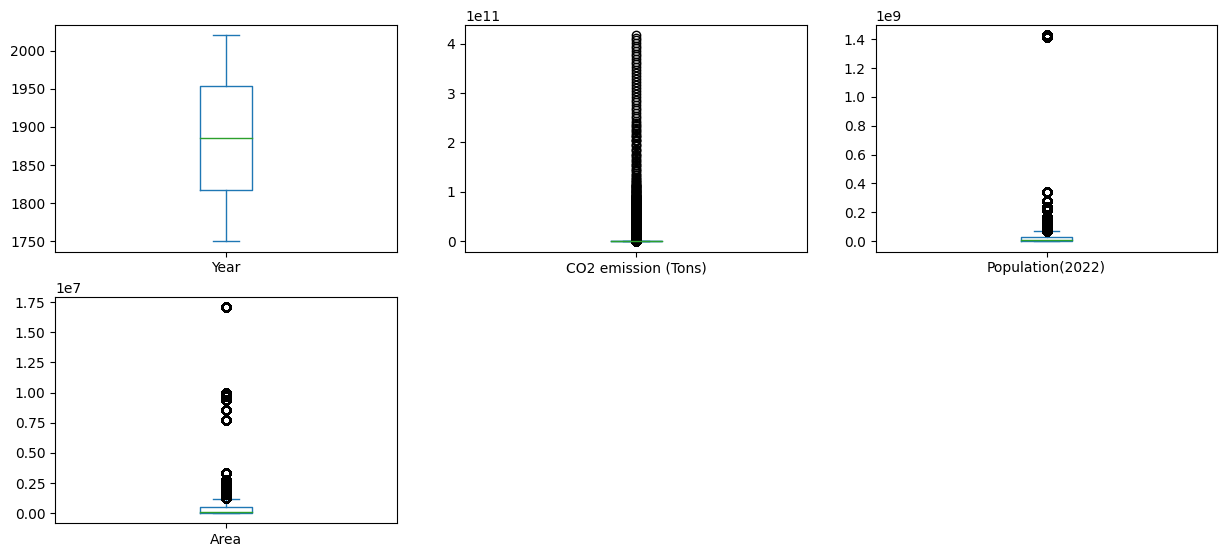

In [15]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Para finalizar as primeiras análises do dataset, o código abaixo cria as médias de Co2 emitidas por país. Com isso, podemos observar que, em média, o país que mais emitiu CO2 durante esses anos considerados foi os Estados Unidos.

In [16]:
# Calcular a média de CO2 emitido por país
media_co2_por_pais = dataset.groupby('Country')['CO2 emission (Tons)'].mean().reset_index()

# Renomear as colunas para melhor compreensão
media_co2_por_pais.columns = ['Country', 'Average CO2 Emission (Tons)']

# Ordenar do maior para o menor com base na média de CO2 emitido
media_co2_por_pais = media_co2_por_pais.sort_values(by='Average CO2 Emission (Tons)', ascending=False)

# Exibir o resultado
print(media_co2_por_pais)

               Country  Average CO2 Emission (Tons)
210      United States                 7.036446e+10
209     United Kingdom                 2.273831e+10
74             Germany                 1.955915e+10
39               China                 1.536124e+10
163             Russia                 1.505808e+10
..                 ...                          ...
165       Saint Helena                 2.547829e+04
144               Niue                 2.342095e+04
216  Wallis and Futuna                 1.953218e+04
205             Tuvalu                 1.644321e+04
6           Antarctica                 1.418279e+04

[220 rows x 2 columns]


## 2.5 - Visualizações Multimodais

A análise das visualizações multimodais permite entender como os atributos interagem entre si. Para isso, iremos verificar a covariância entre as variáveis númericas do dataset a partir do coeficiente de correlação de Pearson atráves da matriz de correlação, que segue a seguinte lógica:


*   Próximo de -1 - Há uma correlação negativa entre as variáveis;
*   Próximo a +1 - Existe uma correlçaõ positiva entre as variáveis;
*   0: Não existe correlação entre as variávies.


Para iniciar as visualizações multimodais, vamos converter os atributos string em float.

In [17]:
# Criando novo dataset para tratamento de missings com todas as colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
DatasetVM = dataset[col[:]]

In [18]:
DatasetVM["% of World"] = DatasetVM["% of World"].str.replace('%','', regex=True)
DatasetVM['% of World'] = DatasetVM['% of World'].astype(float)

DatasetVM["Density(km2)"] = DatasetVM["Density(km2)"].str.replace('km²','', regex=True)
DatasetVM["Density(km2)"] = DatasetVM["Density(km2)"].str.replace('/','', regex=True)
DatasetVM["Density(km2)"] = DatasetVM["Density(km2)"].str.replace(',','.', regex=True)
DatasetVM['Density(km2)'] = DatasetVM['Density(km2)'].astype(float)

In [19]:
# Exbindo as primeiras linhas do novo DatasetVM

DatasetVM.head(10)

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.4,63.0
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.4,63.0
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.4,63.0
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.4,63.0
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.4,63.0
5,Afghanistan,AF,93,1755,0.0,41128771.0,652230.0,0.4,63.0
6,Afghanistan,AF,93,1756,0.0,41128771.0,652230.0,0.4,63.0
7,Afghanistan,AF,93,1757,0.0,41128771.0,652230.0,0.4,63.0
8,Afghanistan,AF,93,1758,0.0,41128771.0,652230.0,0.4,63.0
9,Afghanistan,AF,93,1759,0.0,41128771.0,652230.0,0.4,63.0


Com o objetivo de criar uma visualização da matriz correlação, iremos criar um terceiro dataset com a exclusão do atributo Country e Code, por se tratarem de strings.

In [20]:
# Criando novo dataset para tratamento de missings com todas as colunas
col = list(DatasetVM.columns)

# o novo dataset irá conter todas as colunas
DatasetMatriz = DatasetVM[col[:]]

# Removendo os atributos 'Country' e 'Code'
DatasetMatriz.drop(['Country', 'Code', 'Calling Code'], axis=1, inplace= True)

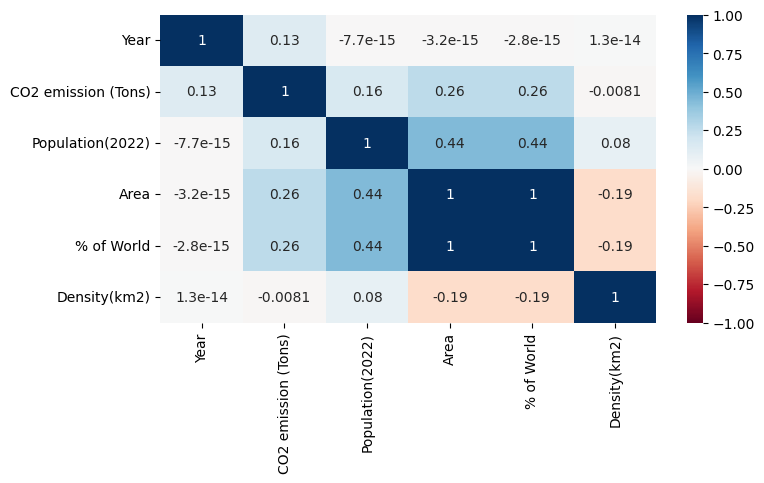

In [21]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (8,4))
sns.heatmap(DatasetMatriz.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

A primeira vista, podemos observar que o atributo Co2 Emission, que é a variável de interesse desse modelo, parece não ter correlações significativas com outras variáveis do dataset.

---



# 3 Visualizações de dados

Nessa sessão, nosso principal objetivo é criar algumas visualizações de dados que nos ajudarão a entender o comportamento do dataset.

Sendo assim, o bloco de código abaixo cria um gráfico de linha do número de CO2 emitido ao longo dos anos.

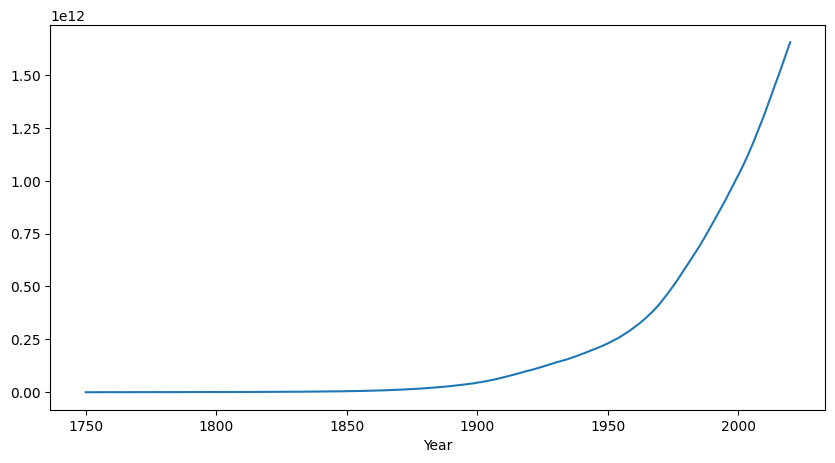

In [22]:
DatasetVM.groupby('Year')['CO2 emission (Tons)'].sum().plot(figsize=(10,5));

A partir do gráfico acima, podemos observar que o nível de CO2 emitido no ano teve um aumento exponencial a partir de 1900. Ainda, pesquisas indicam que, a partir de 1970, a emissão de Co2 aumentou cerca de 90%.

O código abaixo também ilustra os países que mais emitem Co2 ao longo do tempo. Com ele, podemos observar que Estados Unidos, China, Rússia, Alemanha e Inglaterra são as principais fontes de emissão de Co2.


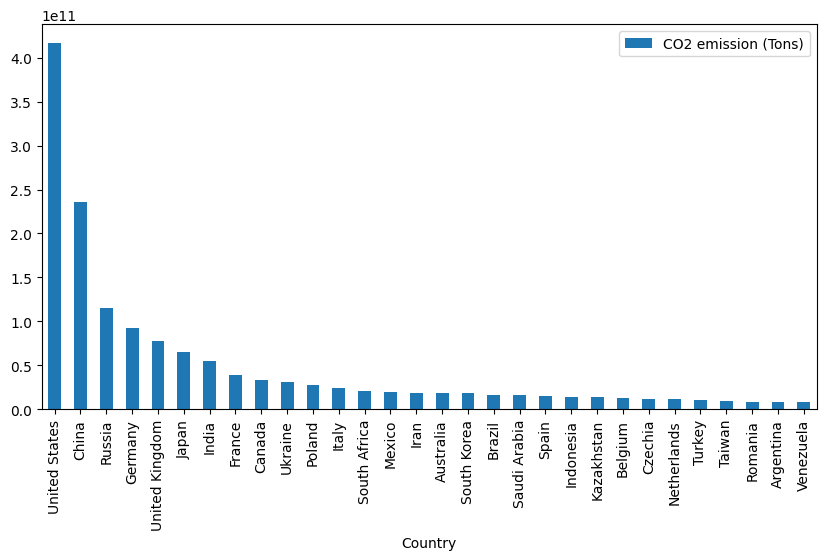

In [23]:
DatasetVM[DatasetVM['Year']==2020].sort_values(by='CO2 emission (Tons)', ascending=False).head(30).plot.bar(x='Country',y='CO2 emission (Tons)',figsize=(10,5));

O gráfico abaixo compara a evolução da emissão de Co2 dos top 5 países observados acima, além do Brasil.

In [24]:
df_top5=DatasetVM[(DatasetVM['Country']=='United States')|
                  (DatasetVM['Country']=='China')|
                  (DatasetVM['Country']=='Russia')|
                  (DatasetVM['Country']=='Germany')|
                  (DatasetVM['Country']=='United Kingdom')|
                  (DatasetVM['Country']== 'Brazil')]

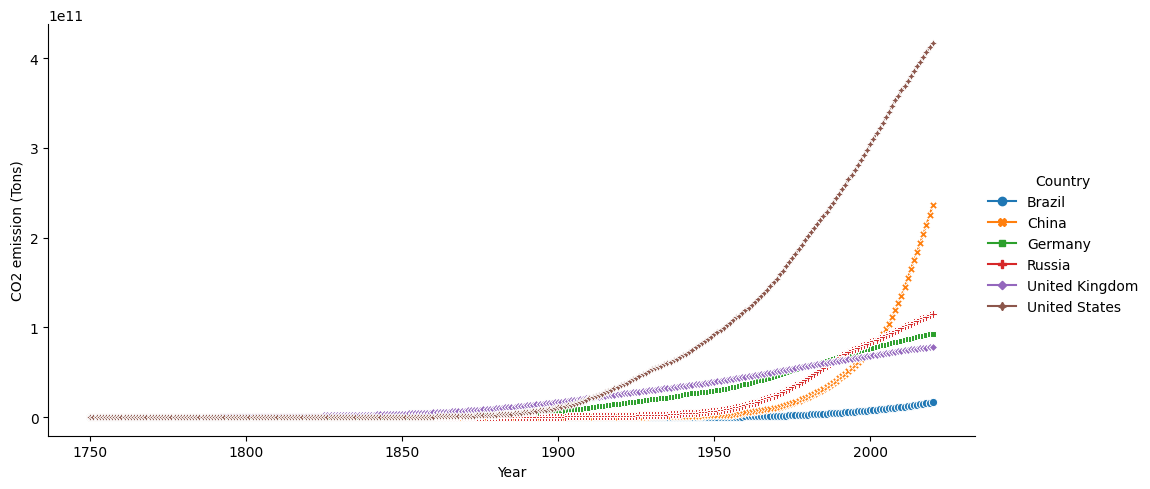

In [25]:
ax=sns.relplot(x="Year", y="CO2 emission (Tons)",
            data=df_top5, kind="line",
            hue="Country", style="Country",
            markers=True, dashes=False,height=5, aspect=2)

De maneira geral, o gráfico mostra que a emissão de Co2 era lidearado pela Inglaterra até os 1900s. Após isso, o nível de emissão de Co2 do EUA tiveram um aumento exponencial. Por outro lado, a China teve um aumento exponencial no seu nível de emissão de Co2 a partir dos anos 1950s, mas alcança a segunda colocação a partir de 2010.

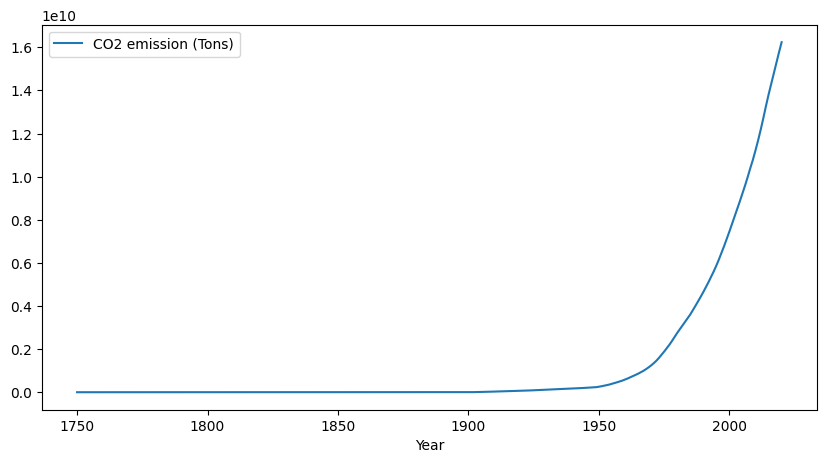

In [26]:
DatasetVM[DatasetVM['Country']=='Brazil'].plot(x='Year',y='CO2 emission (Tons)',figsize=(10,5));

Para o Brasil, o nível de emissão apresenta o mesmo comportamento, no entanto, o aumento exponencial teve um atraso, indicando que esse teve início a partir dos anos 1970s.

## 3.1 - Estudos de caso

Nessa seção, o meu objetivo é criar um estudo de caso do Brasil, Estados Unidos e UK que busca entender como se deu a evolução do nível de emissão de CO2 nesses países.
Para isso, o bloco de código abaixo cria dataframes de cada um desses.

In [27]:
#Criando o Dataframe do Brasil
df1_BR = DatasetVM[(DatasetVM['Country'] == 'Brazil')].reset_index(drop = 'True')

#Criando o Dataframe USA
df1_US = DatasetVM[(DatasetVM['Country'] == 'United States')].reset_index(drop = 'True')

#Criando o Dataframe UK
df1_UK = DatasetVM[(DatasetVM['Country'] == 'United Kingdom')].reset_index(drop = 'True')

#Criando o Dataframe China
df1_CH = DatasetVM[(DatasetVM['Country'] == 'China')].reset_index(drop = 'True')

print(df1_BR.head())
print(df1_US.head())
print(df1_UK.head())
print(df1_CH.head())

  Country Code Calling Code  Year  CO2 emission (Tons)  Population(2022)  \
0  Brazil   BR           55  1750                  0.0       215313498.0   
1  Brazil   BR           55  1751                  0.0       215313498.0   
2  Brazil   BR           55  1752                  0.0       215313498.0   
3  Brazil   BR           55  1753                  0.0       215313498.0   
4  Brazil   BR           55  1754                  0.0       215313498.0   

        Area  % of World  Density(km2)  
0  8515767.0         5.6          25.0  
1  8515767.0         5.6          25.0  
2  8515767.0         5.6          25.0  
3  8515767.0         5.6          25.0  
4  8515767.0         5.6          25.0  
         Country Code Calling Code  Year  CO2 emission (Tons)  \
0  United States   US            1  1750                  0.0   
1  United States   US            1  1751                  0.0   
2  United States   US            1  1752                  0.0   
3  United States   US            1  1

Uma vez definido os Datasets que serão objetos de estudo, iremos dar início a visualização de dados, começando pela evolução do nível de emissão de CO2 ao longo dos anos.

### 3.1.1 - Brasil


Agora, vamos entender como se deu a evolução do nível de CO2 emitido pelo Brasil ao longo dos anos.
Para isso, o código abaixo ilustra a evolução do nível de CO2 emitido por ano em toneladas ao longo dos anos.

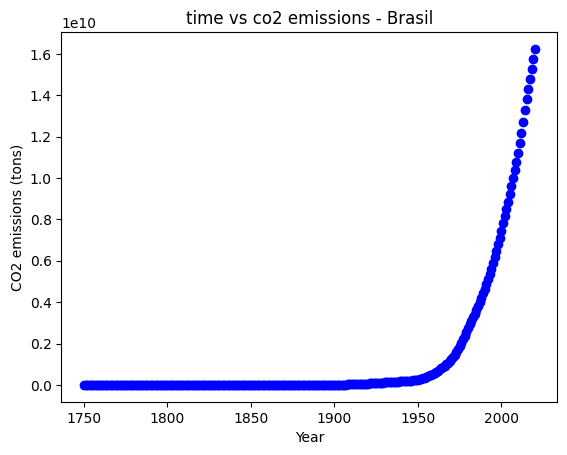

In [45]:
#exploratory plotting - Brasil

fig1=plt.figure()
plt.plot(df1_BR['Year'],df1_BR['CO2 emission (Tons)'],'bo')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (tons)')
plt.title('time vs co2 emissions - Brasil')

plt.savefig('timevsco2')

A partir desse gráfico podemos observar que o boom da emissão de CO2 aconteceu Pós 1950. Para melhor entender como se deu a evolução nos anos pós 1950s, o bloco de código abaixo cria um segundo dataset para o Brasil filtrando os dados e retornando apenas os dados posterior esse data. Após isso, plotamos um segundo gráfico como o de cima.

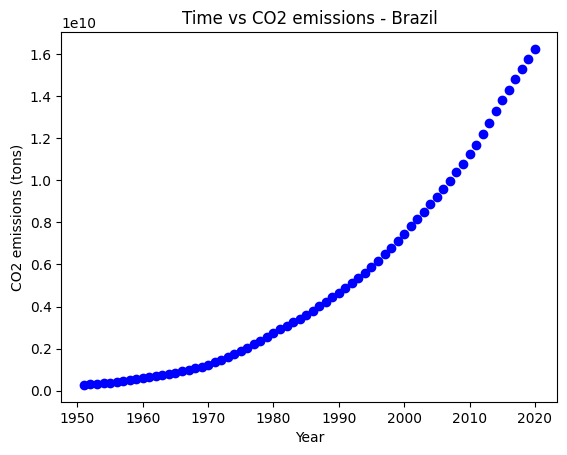

In [47]:
# Filtrar os dados para o Brasil e anos maiores que 1950
df2_BR = DatasetVM[(DatasetVM['Country'] == 'Brazil') & (DatasetVM['Year'] > 1950)]

# Plotar o gráfico
fig1 = plt.figure()
plt.plot(df2_BR['Year'], df2_BR['CO2 emission (Tons)'], 'bo')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (tons)')
plt.title('Time vs CO2 emissions - Brazil')

# Salvar o gráfico como um arquivo
plt.savefig('time_vs_co2.png')

# Exibir o gráfico
plt.show()

Agora, com o novo gráfico, podemos observar que o boom na emissão de gás carbônico aconteceu, de maneira exponencial, após os anos 70s.

### 3.1.2 - USA


Agora, vamos entender como se deu a evolução do nível de CO2 emitido pelos Estados Unidos ao longo dos anos.
Para isso, o código abaixo ilustra a evolução do nível de CO2 emitido por ano em toneladas ao longo dos anos.

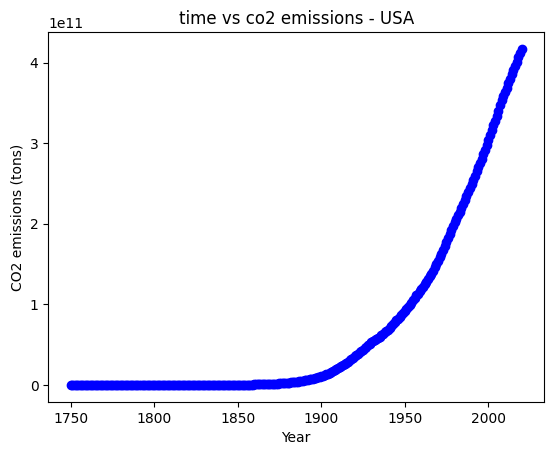

In [51]:
#exploratory plotting - USA

fig1=plt.figure()
plt.plot(df1_US['Year'],df1_US['CO2 emission (Tons)'],'bo')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (tons)')
plt.title('time vs co2 emissions - USA')

plt.savefig('timevsco2')

Da mesma forma como feito para o Brasil, vamos construir um segundo Dataset que irá filtrar os dados para os anos maiores que 1900s. Com isso, o próximo gráfico dará um zoom nessa análise.

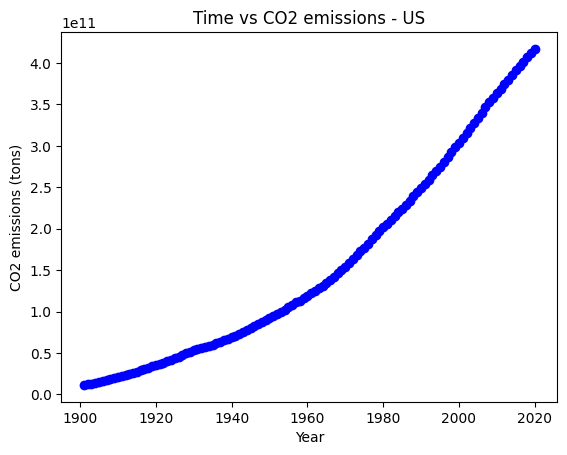

In [50]:
# Filtrar os dados para o USA e anos maiores que 1950
df2_US = DatasetVM[(DatasetVM['Country'] == 'United States') & (DatasetVM['Year'] > 1900)]

# Plotar o gráfico
fig1 = plt.figure()
plt.plot(df2_US['Year'], df2_US['CO2 emission (Tons)'], 'bo')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (tons)')
plt.title('Time vs CO2 emissions - US')

# Salvar o gráfico como um arquivo
plt.savefig('time_vs_co2US.png')

# Exibir o gráfico
plt.show()

Com essa nova visualização, podemos observar que, apesar do aumento ter inciado entre os anos 1900 e 1920, para os Estados Unidos, o aumento exponencial aconteceu por volta dos anos 30s e 40s, aproximadamente.

### 3.1.2 - China


Agora, vamos entender como se deu a evolução do nível de CO2 emitido pela China ao longo dos anos.
Para isso, o código abaixo ilustra a evolução do nível de CO2 emitido por ano em toneladas ao longo dos anos.

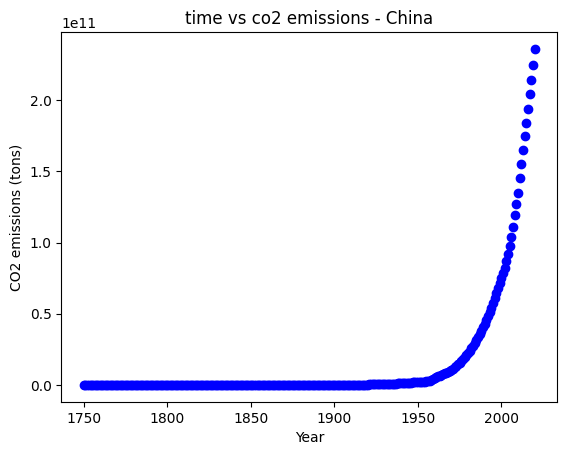

In [52]:
#exploratory plotting - China

fig1=plt.figure()
plt.plot(df1_CH['Year'],df1_CH['CO2 emission (Tons)'],'bo')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (tons)')
plt.title('time vs co2 emissions - China')

plt.savefig('timevsco2')

Assim como o Brasil, a China mantinha a emissão de CO2 em níveis moderados até o fim da década de 1950, quando apresentou um crescimento acelerado. O código abaixo também faz um corte nos dados no tempo e cria um gráfico com as informações após o ano 1950.

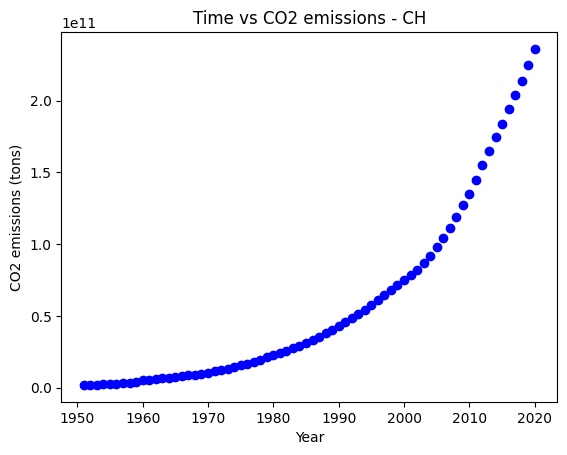

In [54]:
# Filtrar os dados para China e anos maiores que 1950
df2_CH = DatasetVM[(DatasetVM['Country'] == 'China') & (DatasetVM['Year'] > 1950)]

# Plotar o gráfico
fig1 = plt.figure()
plt.plot(df2_CH['Year'], df2_CH['CO2 emission (Tons)'], 'bo')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (tons)')
plt.title('Time vs CO2 emissions - CH')

# Salvar o gráfico como um arquivo
plt.savefig('time_vs_co2CH.png')

# Exibir o gráfico
plt.show()

## 3.2 - Análise de evolução entre países

O código abaixo cria dois datasets que tem como objetivo relacionar a evolução de emissão de CO2 entre os Estados Unidos, UK e China, com o ojetivo de entender a mudança de liderança no ranking de países mais emissores de CO2.

In [55]:
#criando um Dataset completo com os países ditos

df_top3=DatasetVM[(DatasetVM['Country']=='United States')|
                  (DatasetVM['Country']=='China')|
                  (DatasetVM['Country']=='United Kingdom')]

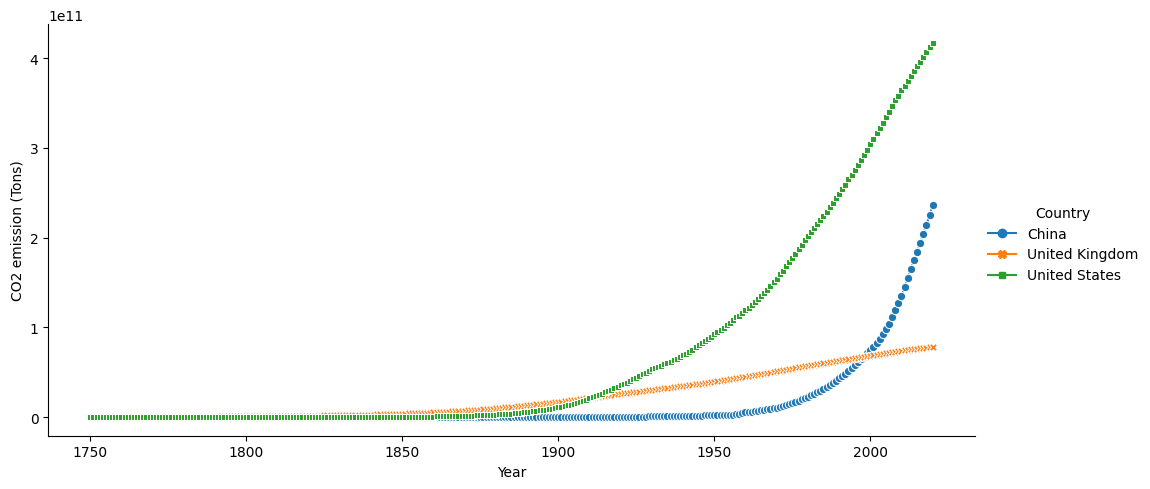

In [57]:
ax=sns.relplot(x="Year", y="CO2 emission (Tons)",
            data=df_top3, kind="line",
            hue="Country", style="Country",
            markers=True, dashes=False,height=5, aspect=2)

A partir desse gráfico, podemos observar que UK liderou o ranking até o início do século XX, quando foi ultrapassado pelos USA.
O bloco de código abaixo cria uma nova visualização usando os dados a partir de 1850.

In [58]:
# Filtrando o dataset para os países mencionados e anos a partir de 1850
df1_top3 = DatasetVM[(DatasetVM['Country'].isin(['United States', 'China', 'United Kingdom'])) &
                    (DatasetVM['Year'] >= 1850)]

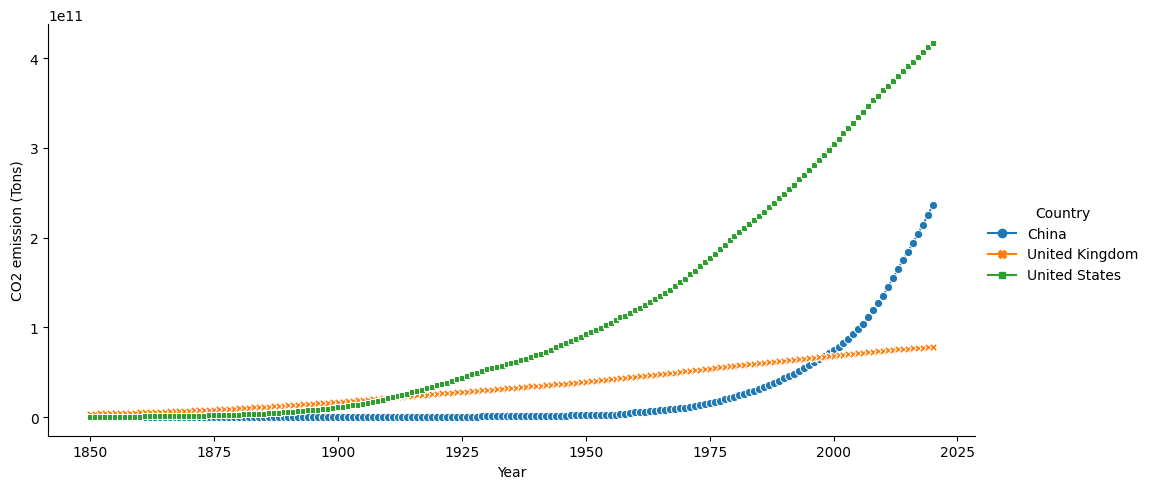

In [59]:
ax=sns.relplot(x="Year", y="CO2 emission (Tons)",
            data=df1_top3, kind="line",
            hue="Country", style="Country",
            markers=True, dashes=False,height=5, aspect=2)

Já o gráfico acima mostra que o UK é ultrapassado pela china apenas no final do Século XX, no entanto, entre 1950 e 1975, Rússia e Alemanha já tinham ultrapassado o país no ranking dos mais poluentes.

# 4 - Tratamento de dados

Com o objetivo de criar um modelo de aprendizado de máquina supervicionado, nessa parte, iremos tratar os missings do DatasetVM.

In [28]:
# verificando nulls no dataset
DatasetVM.isnull().sum()

Country                   0
Code                   2168
Calling Code           3523
Year                      0
CO2 emission (Tons)       0
Population(2022)       6504
Area                   4336
% of World             4336
Density(km2)           6504
dtype: int64

Antes de darmos início ao tratamento de dados, iremos criar um novo dataset para resguardar o orginal. Além disso, para uma melhor visualização da proporção de dados faltantes em cada atributo, o código abaixo também exibe uma visualização matricial dessa nulidade.

<Axes: >

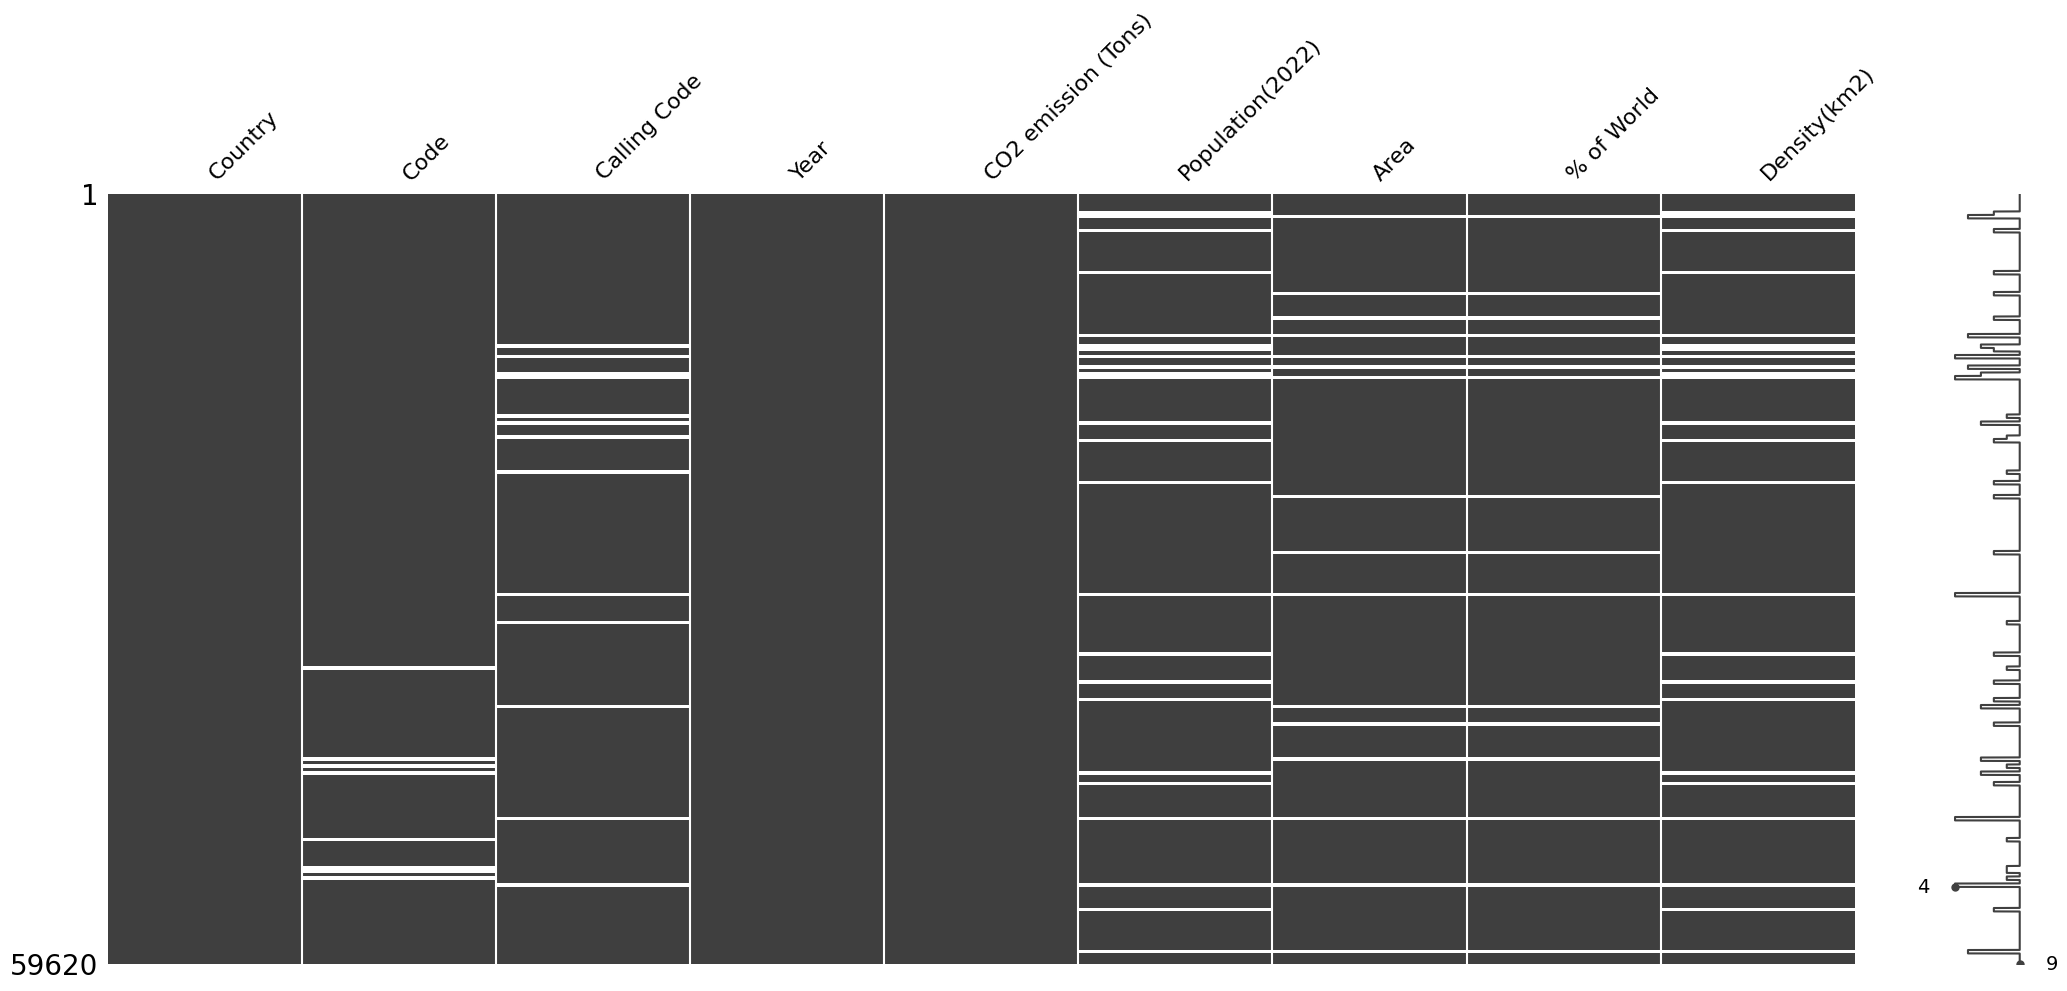

In [29]:
# Criando novo dataset para tratamento de missings com todas as colunas
col = list(DatasetVM.columns)

# o novo dataset irá conter todas as colunas
DatasetML = DatasetVM[col[:]]

# exibindo visualização matricial da nulidade do dataset
ms.matrix(DatasetML)

Como podemo observar, temos alguns problemas de dados faltantes. Para tratá-los, iremos usar duas abordagens distintas:

  1. Code e Calling Code - levando em consideração que esses dois atributos apenas existem para identificar o país que já está identificado no atributo 'Country', iremos excluí-lo do modelo.

  2. Atributos Population, Area, %of world e density(km2) serão substituítos pela mediana de cada atritubto.

In [30]:
# removendo as colunas 'Code' e 'Calling Code'
DatasetML.drop(['Code', 'Calling Code'], axis=1, inplace= True)

# substituindo os NaN pela mediana da coluna
DatasetML['Population(2022)'].fillna(DatasetML['Population(2022)'].median(), inplace=True)
DatasetML['Area'].fillna(DatasetML['Area'].median(), inplace=True)
DatasetML['Density(km2)'].fillna(DatasetML['Density(km2)'].median(), inplace=True)

# substituindo os NaN de '%of world' por 0
DatasetML['% of World'].fillna(0, inplace=True)

<Axes: >

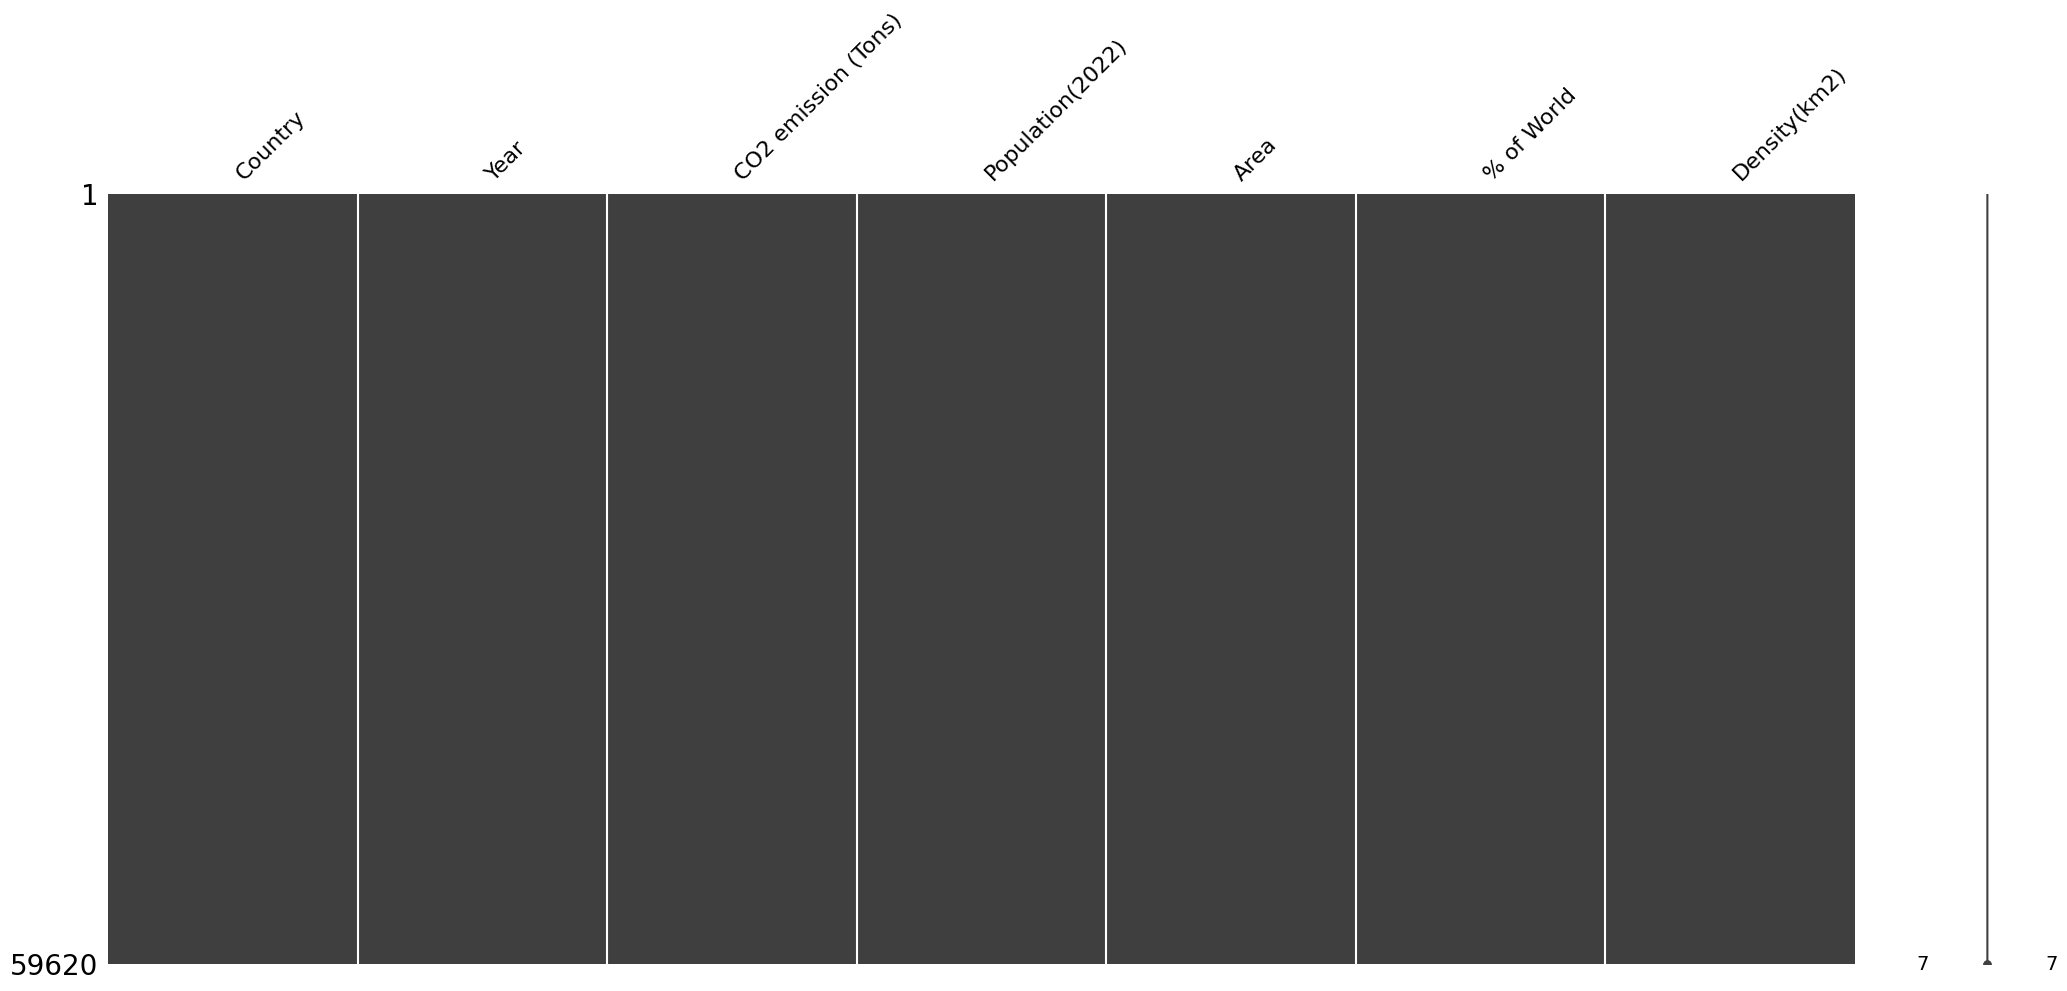

In [31]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(DatasetML)

# Modelo de Machine Learning

Nessa seção, nosso objetivo é construir um modelo de aprendizado de máquina supervisionado que tem como objetivo criar predições da quantidade de CO2 emitido usando os demais atributos do dataset.
Para isso, dividimos esse seção em três partes:

1. Seleção das variáveis indepedentes (modelos de Feature selection) e construção do Dataset
2. Modalagem - selecionaremos os melhores modelos de ML
3. Inferência e apresentação de resultados

## 3.1 Modelos de Feature selection

Agora, com o objetivo de determinar quais são as variáveis mais relevantes para explicar as variações na emissão de Co2, o código abaixo prepara os dados separando a base em Treino e testes.

In [32]:
# Verificar as colunas e suas posições atuais
print("Colunas antes da mudança:")
print(DatasetML.columns)

Colunas antes da mudança:
Index(['Country', 'Year', 'CO2 emission (Tons)', 'Population(2022)', 'Area',
       '% of World', 'Density(km2)'],
      dtype='object')


In [33]:
# Nome da coluna que você quer mover (CO2 emission)
coluna_para_mover = DatasetML.columns[2]

# Remover a coluna da posição atual
coluna_dados = DatasetML.pop(coluna_para_mover)

# Inserir a coluna na nova posição desejada (posição 9)
DatasetML.insert(6, coluna_para_mover, coluna_dados)

# Verificar as colunas e suas novas posições
print("\nColunas após a mudança:")
print(DatasetML.columns)


Colunas após a mudança:
Index(['Country', 'Year', 'Population(2022)', 'Area', '% of World',
       'Density(km2)', 'CO2 emission (Tons)'],
      dtype='object')


In [34]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = DatasetML.values
X = array[:,1:6] # atributos
y = array[:,6] # target

In [35]:
#importanto pacotes necessários

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", DatasetML.columns[1:6])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=DatasetML.columns[1:6]))


Número original de atributos: 5

Número reduzido de atributos: 4

Atributos Originais: Index(['Year', 'Population(2022)', 'Area', '% of World', 'Density(km2)'], dtype='object')

Scores dos Atributos Originais: [3.729 2.324 3.37  3.364 0.8  ]

Atributos Selecionados: ['Year' 'Population(2022)' 'Area' '% of World']


A partir disso, podemos concluir que o modelo foi reduzido a 4 atributos, sendo os principais que podem ajudar a explicar as variações de CO2 nesse dataset os atributos 'Year', 'Population(2022)', 'Area' e '% of world'.


## 3.2 Modelagem

Nessa seção iremos criar o dataset que usaremos no modelo de ML. Sendo assim, usaremos a conclusões da seção anterior. Depois, iremos dividir essa base de dados em treino e teste e, por fim, identificar o melhor melhor algoritmo de previsão.

In [37]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

In [38]:
# Criando novo dataset para construção do modelo de ML
col = list(DatasetML.columns)

# o novo dataset irá conter todas as colunas inicialmente
DatasetFM = DatasetML[col[:]]

# removendo os atributos citados
DatasetFM.drop(['Country', 'Density(km2)'], axis=1, inplace= True)

# exibindo as primeiras linhas
DatasetFM.head()

,Year,Population(2022),Area,% of World,CO2 emission (Tons)
0,1750,41128771.0,652230.0,0.4,0.0
1,1751,41128771.0,652230.0,0.4,0.0
2,1752,41128771.0,652230.0,0.4,0.0
3,1753,41128771.0,652230.0,0.4,0.0
4,1754,41128771.0,652230.0,0.4,0.0


O código abaixo, portanto, separa o dataset em treino e teste usando a técnica de holdout em que 20% do dataset é separado para teste e 80% será usado para treino. Além disso, definimos os parêmtros de validação cruzada (acurácia) e em 10 folds.

In [39]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = DatasetFM.values
X = array[:,0:4] # atributos
y = array[:,4] # (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

LR: MSE 103501551434858364928.00 (31023962064597446656.00) - RMSE 10173571223.27
Ridge: MSE 103501538385231888384.00 (31024221626565861376.00) - RMSE 10173570581.92
Lasso: MSE 103501554964083785728.00 (31024167279653150720.00) - RMSE 10173571396.72
KNN: MSE 124909883161700064.00 (128784547540332080.00) - RMSE 353425923.16
CART: MSE 104039826267180032.00 (64031957208497288.00) - RMSE 322552052.03


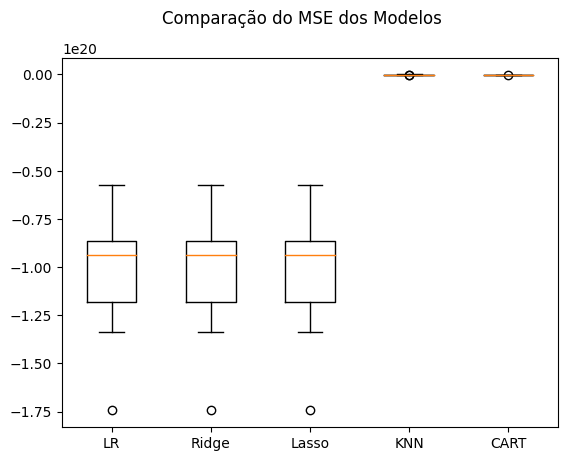

In [40]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [41]:
# Criando um modelo com todo o conjunto de treino
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 66527807196608168.00
RMSE 257929849.37


# 5 - Conclusão ML

De forma geral, o modelo que apresenta melhor resultado é aquele que gera o menor MSE e, consequentemente, o menor RMSE. Logo, podemos concluir que um dos melhores algoritmos aqui apresentado é o de KNN.
No entanto, a análise de componentes principais, matriz de correlação e avaliando os resultados obtidos a partir da estimação desse modelo, podemos concluir que o dataset em questão não tem atributos suficientes para explicar a evolução da emissão de CO2 ao longo do tempo. Para construção de um modelo de ML que seja capaz de fazer isso, sugiro acrescentar novas variáveis ao modelo ou usar algortimos de série temporal estimados por Max verossimilhança.